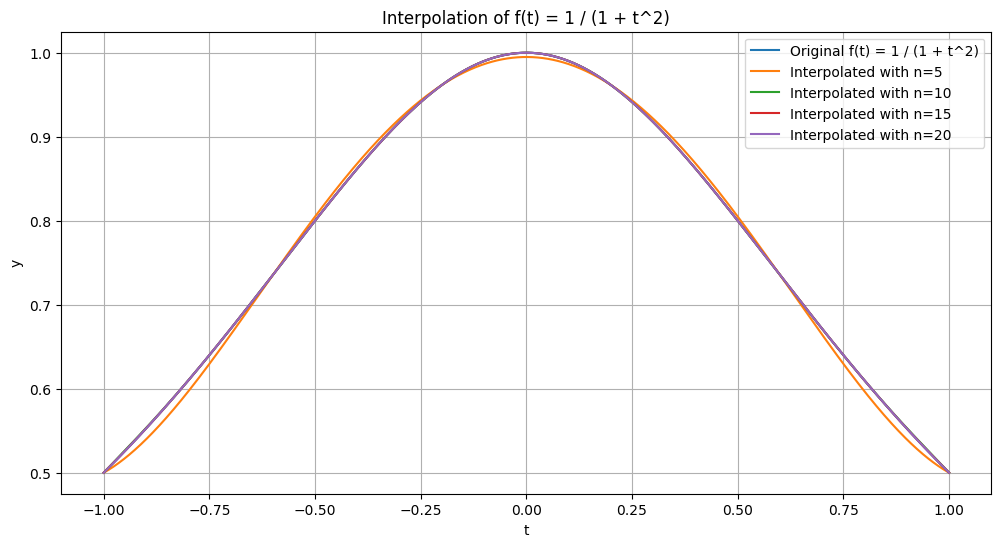

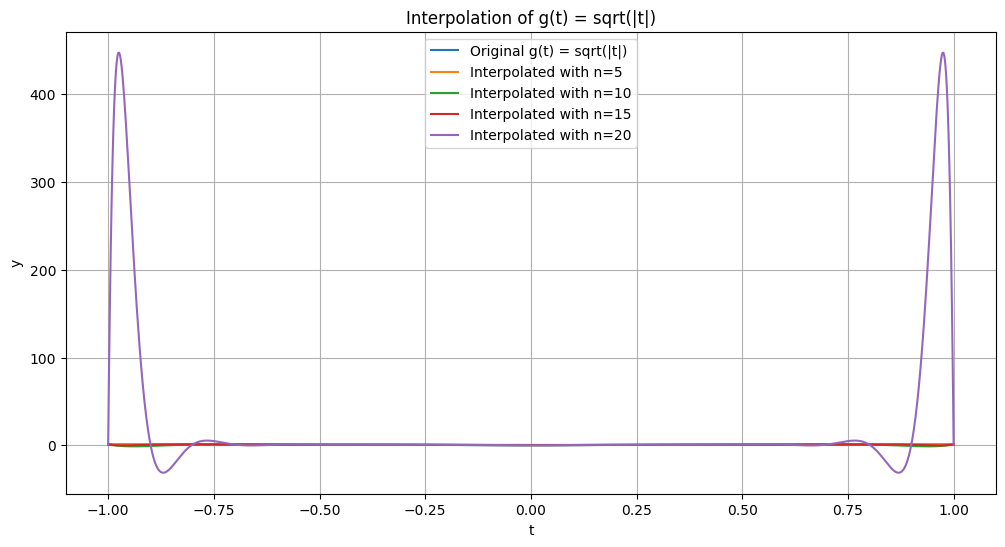

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def newton_coeff(t, y):
    """
    Berechnet die Newton-Koeffizienten für die gegebenen Stützstellen und Stützwerten.
    t: Stützstellen
    y: Stützwerten
    """
    n = len(t)
    a = np.copy(y)
    for j in range(1, n):
        for i in range(n-1, j-1, -1):
            a[i] = (a[i] - a[i-1]) / (t[i] - t[i-j])
    return a

def newton_value(t, a, x):
    """
    Evaluates the Newton interpolating polynomial and its derivative at a given point x.
    t: Stützstellen
    a: Newton-Koeffizienten
    x: Punkt, an dem das Polynom und seine Ableitung ausgewertet werden
    """
    n = len(a)
    p = a[-1]
    dp = 0
    for k in range(n-2, -1, -1):
        dp = dp * (x - t[k]) + p
        p = p * (x - t[k]) + a[k]
    return p, dp

# Interpolationsparameter
n_values = [5, 10, 15, 20]
functions = [
    ("f(t) = 1 / (1 + t^2)", lambda t: 1 / (1 + t**2)),
    ("g(t) = sqrt(|t|)", lambda t: np.sqrt(np.abs(t)))
]

# Interpolieren und grafisch darstellen
for name, func in functions:
    plt.figure(figsize=(12, 6))
    t_dense = np.linspace(-1, 1, 1000)
    y_dense = func(t_dense)
    plt.plot(t_dense, y_dense, label=f'Original {name}')

    for n in n_values:
        t = np.linspace(-1, 1, n+1)
        y = func(t)
        a = newton_coeff(t, y)
        y_interp = np.array([newton_value(t, a, xi)[0] for xi in t_dense])

        plt.plot(t_dense, y_interp, label=f'Interpolated with n={n}')
    
    plt.title(f'Interpolation of {name}')
    plt.xlabel('t')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)
    plt.show()
